In [1]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import seaborn as sns
import cv2
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
GRAPHS_FOLDER = 'Graphs/{}.png'

## Пункт 1

Разбейте множество объектов из набора данных pluton.csv на 3 кластера с помощью k-means. Сравните качество разбиения в зависимости от максимального числа итераций алгоритма и использования стандартизации.

In [3]:
data = pd.read_csv('pluton.csv')
data.head()

,Pu238,Pu239,Pu240,Pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128


In [4]:
def cluster_data(data, show=True, graph_name=None):
    for iterations in [1, 10, 100, 1000]:
        kmeans = KMeans(n_clusters=3, max_iter=iterations, random_state=20).fit(data)

        data['cluster'] = pd.Series(kmeans.labels_, index=data.index)
        print('Maximum number of iterations is', iterations)
        print('Silhouette score\t', silhouette_score(data, kmeans.labels_))
        print('Number of iterations\t',kmeans.n_iter_)
        print()
        
        sns.set(font_scale=1.5)
        g = sns.pairplot(data, hue='cluster', diag_kind='hist', palette='deep')
        g.fig.suptitle('max_iter=' + str(iterations), y=1.05)
        if graph_name is not None:
            g.fig.savefig(GRAPHS_FOLDER.format(graph_name + ' Max iter=' + str(iterations)), bbox_inches='tight')
        if show:
            plt.show()
        else:
            plt.close(g.fig)

In [5]:
cluster_data(data, False, 'Task 1/Clustering without standardization.')

Maximum number of iterations is 1
Silhouette score	 0.6782467064358735
Number of iterations	 1

Maximum number of iterations is 10
Silhouette score	 0.6782467064358735
Number of iterations	 3

Maximum number of iterations is 100
Silhouette score	 0.6782467064358735
Number of iterations	 3

Maximum number of iterations is 1000
Silhouette score	 0.6782467064358735
Number of iterations	 3



Так как качество разбиения на непродобработанном датасете не менятеся от максимального числа итераций, то рассмотрим лишь один парный график.

In [6]:
def show_image(path, size=(9, 9)):
    img = mpimg.imread(GRAPHS_FOLDER.format(path))
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

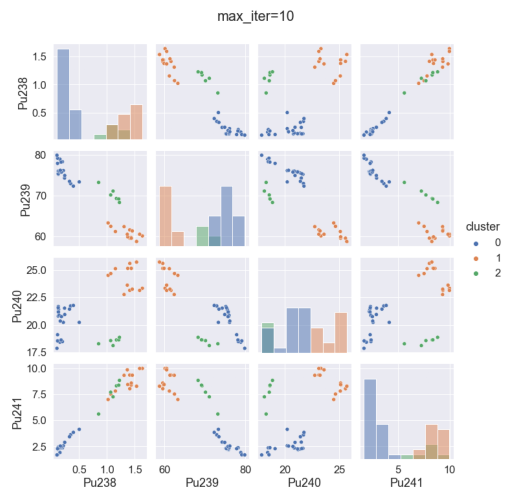

In [7]:
show_image('Task 1/Clustering without standardization. Max iter=10')

In [8]:
scaler = StandardScaler()
data = data.loc[:, data.columns != 'cluster']
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head()

,Pu238,Pu239,Pu240,Pu241
0,-1.048768,0.832106,-0.138176,-1.056029
1,-1.036442,0.791133,-0.052625,-1.035913
2,-1.047007,0.742931,0.056409,-1.014121
3,-0.995944,1.267063,-1.302330,-1.147892
4,-0.384949,0.479518,-0.549572,-0.402930


In [9]:
cluster_data(data, False, 'Task 1/Clustering with standardization.')

Maximum number of iterations is 1
Silhouette score	 0.7466594999843088
Number of iterations	 1

Maximum number of iterations is 10
Silhouette score	 0.7466594999843088
Number of iterations	 2

Maximum number of iterations is 100
Silhouette score	 0.7466594999843088
Number of iterations	 2

Maximum number of iterations is 1000
Silhouette score	 0.7466594999843088
Number of iterations	 2



Ситуация, аналогичная с неепредобработтаным датасетом. Общее качество разбиения улучшилось, однако всё также не зависит от максимального числа итераций.

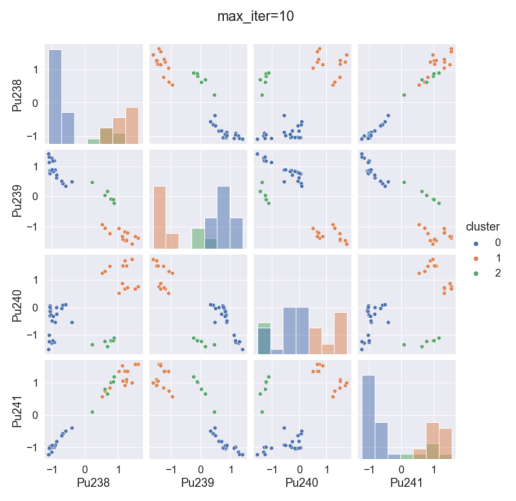

In [10]:
show_image('Task 1/Clustering with standardization. Max iter=10')

## Пункт 2

Разбейте на кластеры множество объектов из наборов данных clustering_1.csv, clustering_2.csv и clustering_3.csv с помощью k-means, DBSCAN и иерархической кластеризации. Определите оптимальное количество кластеров (где это применимо). Какой из методов сработал лучше и почему?

In [11]:
def KMEANS_cluster(data, graph_name=None):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    plt.subplots_adjust(hspace=0.3)
    plt.suptitle('KMeans clustering')
    for clusters, ax in zip(range(1, 5), np.ravel(axes)):
        model = KMeans(n_clusters=clusters, random_state=42).fit(data)
        ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=model.labels_, cmap='Accent')
        ax.set_title('Num clusters=' + str(clusters))        
    if graph_name is not None:
        plt.savefig(GRAPHS_FOLDER.format(graph_name), bbox_inches='tight')
    plt.show()

In [12]:
def DBSCAN_cluster(data, eps, min_samples, graph_name=None):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=model.labels_, cmap='Accent')
    plt.title('DBSCAN clustering')
    if graph_name is not None:
        plt.savefig(GRAPHS_FOLDER.format(graph_name), bbox_inches='tight')
    plt.show()

In [13]:
def hierarchical_cluster(data, linkage, graph_name=None):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    plt.subplots_adjust(hspace=0.3)
    plt.suptitle('Hierarchical clustering')
    for clusters, ax in zip(range(1, 5), np.ravel(axes)):
        model = AgglomerativeClustering(n_clusters=clusters, linkage=linkage).fit(data)
        ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=model.labels_, cmap='Accent')
        ax.set_title('Num clusters=' + str(clusters))
    if graph_name is not None:
        plt.savefig(GRAPHS_FOLDER.format(graph_name), bbox_inches='tight')
    plt.show()

In [14]:
df_clustering_1 = pd.read_csv('clustering_1.csv', sep='\t', header=None)
df_clustering_1.head()

,0,1
0,4.19,3.47
1,5.08,6.49
2,6.05,6.22
3,4.63,6.14
4,5.34,4.64


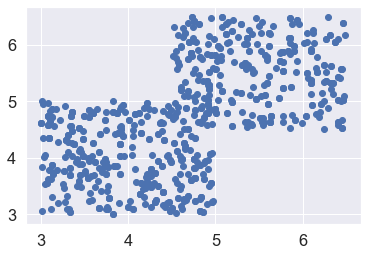

In [15]:
plt.scatter(df_clustering_1.iloc[:, 0], df_clustering_1.iloc[:, 1])
plt.savefig(GRAPHS_FOLDER.format('Task 2/Dataset 1/Raw data'), bbox_inches='tight')
plt.show()

Визуально различимы два кластера.

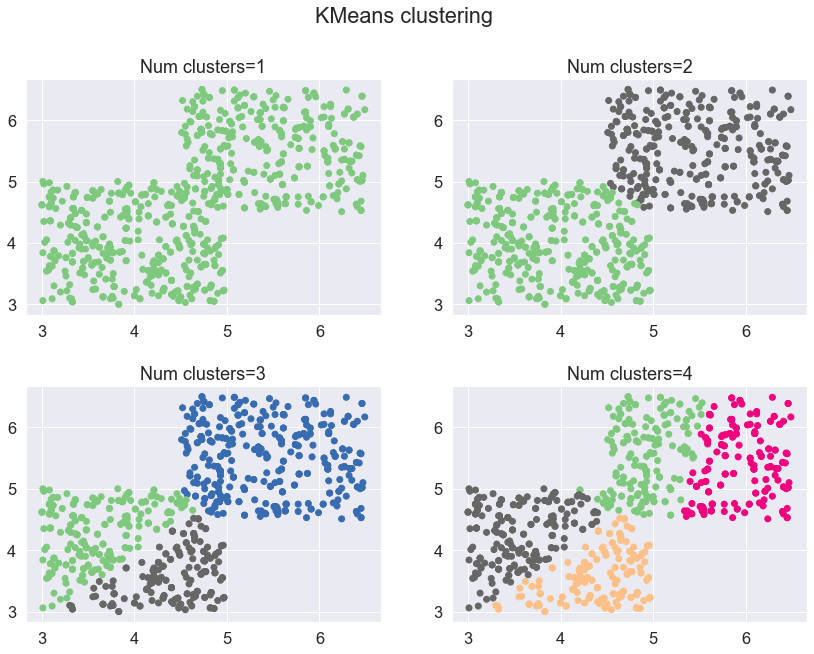

In [16]:
KMEANS_cluster(df_clustering_1, 'Task 2/Dataset 1/KMeans clustering')

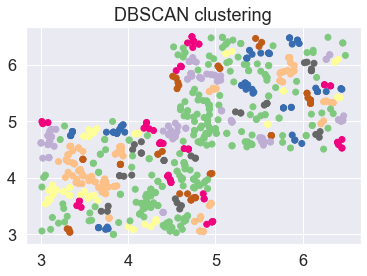

In [17]:
DBSCAN_cluster(df_clustering_1, 0.1, 3, 'Task 2/Dataset 1/DBSCAN clustering')

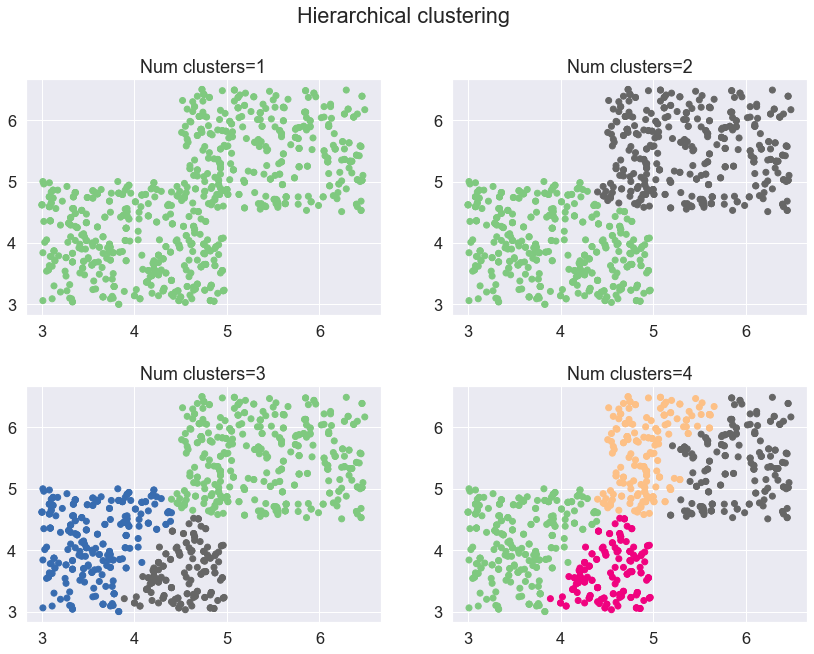

In [18]:
hierarchical_cluster(df_clustering_1, 'ward', 'Task 2/Dataset 1/Hierarchical clustering')

In [19]:
df_clustering_2 = pd.read_csv('clustering_2.csv', sep='\t', header=None)
df_clustering_2.head()

,0,1
0,2.40,0.58
1,1.58,5.45
2,1.15,3.79
3,2.57,0.38
4,5.33,4.51


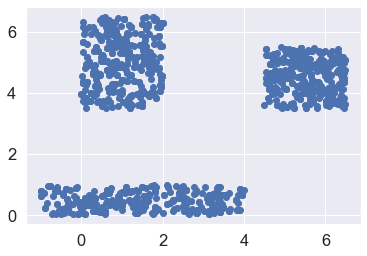

In [20]:
plt.scatter(df_clustering_2.iloc[:, 0], df_clustering_2.iloc[:, 1])
plt.savefig(GRAPHS_FOLDER.format('Task 2/Dataset 2/Raw data'), bbox_inches='tight')
plt.show()

Визуально различимы 3 кластера.

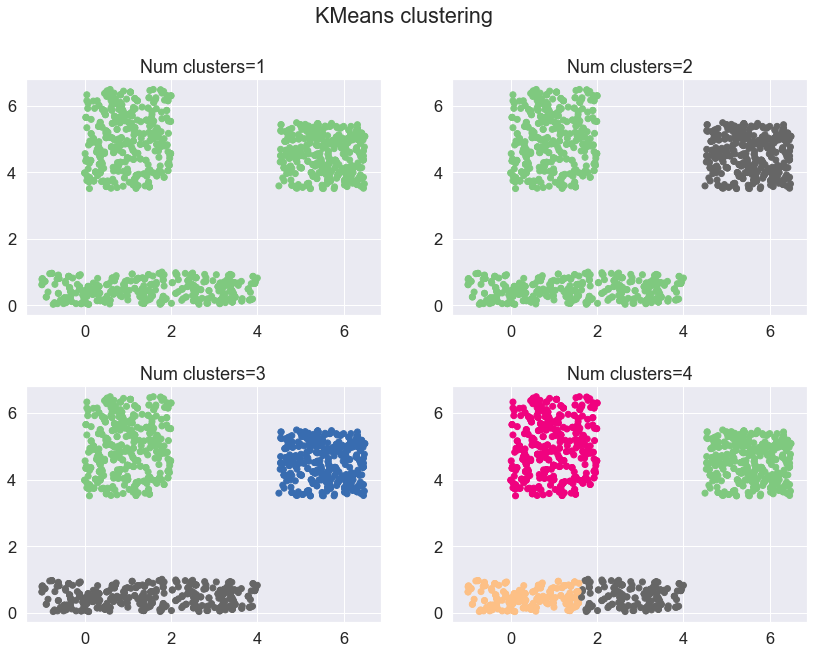

In [21]:
KMEANS_cluster(df_clustering_2, 'Task 2/Dataset 2/KMeans clustering')

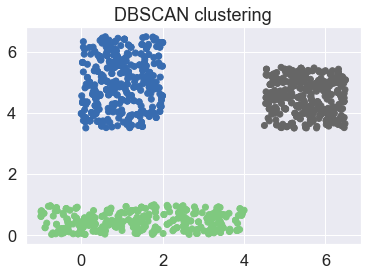

In [22]:
DBSCAN_cluster(df_clustering_2, 0.3, 1, 'Task 2/Dataset 2/DBSCAN clustering')

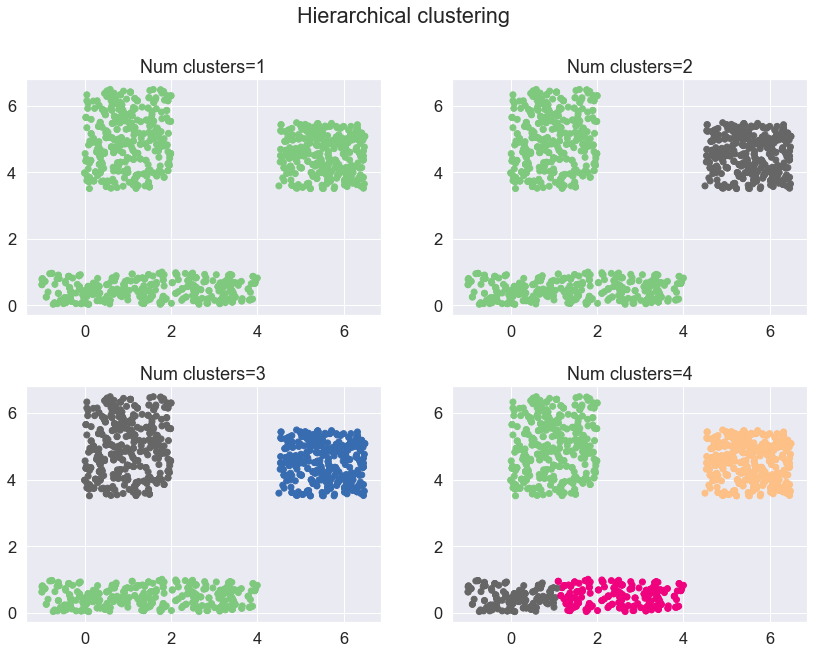

In [23]:
hierarchical_cluster(df_clustering_2, 'ward', 'Task 2/Dataset 2/Hierarchical clustering')

In [24]:
df_clustering_3 = pd.read_csv('clustering_3.csv', sep='\t', header=None)
df_clustering_3.head()

,0,1
0,1.00,1.48
1,2.73,4.88
2,7.24,0.01
3,1.35,3.59
4,0.25,3.88


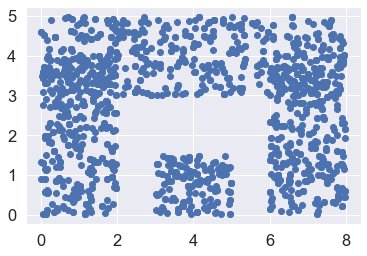

In [25]:
plt.scatter(df_clustering_3.iloc[:, 0], df_clustering_3.iloc[:, 1])
plt.savefig(GRAPHS_FOLDER.format('Task 2/Dataset 3/Raw data'), bbox_inches='tight')
plt.show()

Визуально различимы 2 кластера.

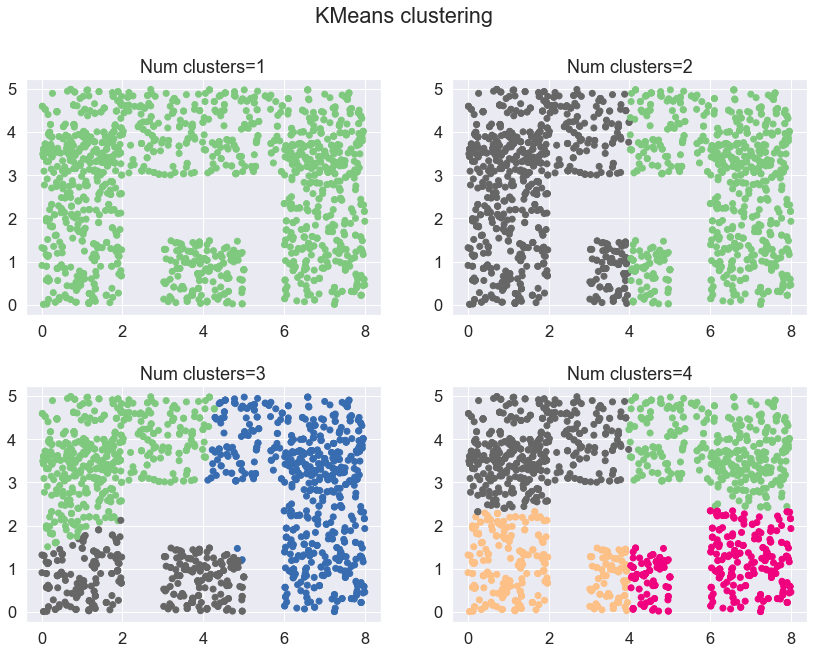

In [26]:
KMEANS_cluster(df_clustering_3, 'Task 2/Dataset 3/KMeans clustering')

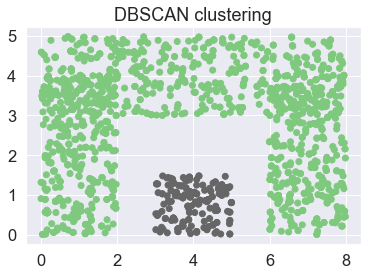

In [27]:
DBSCAN_cluster(df_clustering_3, 0.4, 1, 'Task 2/Dataset 3/DBSCAN clustering')

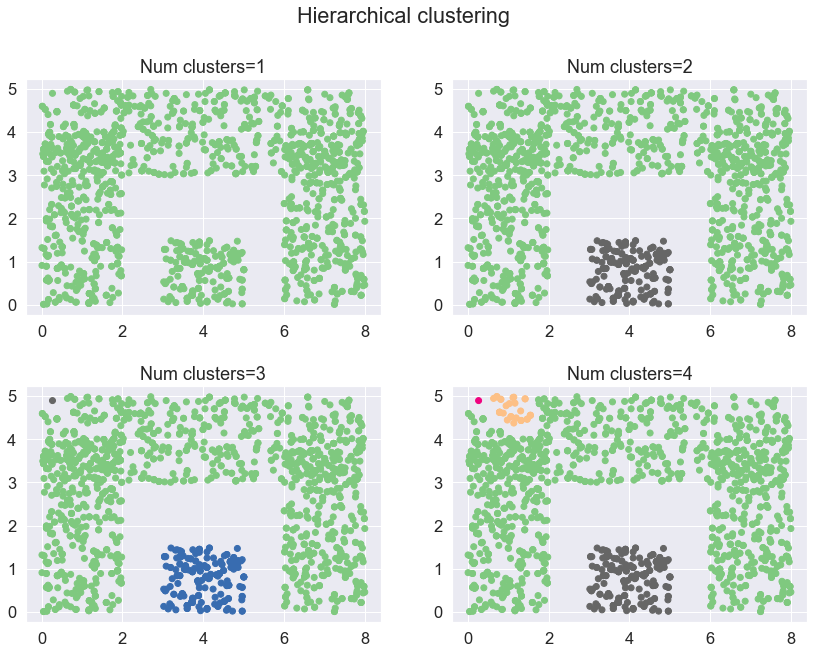

In [28]:
hierarchical_cluster(df_clustering_3, 'single', 'Task 2/Dataset 3/Hierarchical clustering')

## Пункт 3

Осуществите сжатие цветовой палитры изображения (любого, на ваш выбор). Для этого выделите n кластеров из цветов всех пикселей изображения и зафиксируйте центра этих кластеров. Создайте изображение с цветами из сокращенной палитры (цвета пикселей только из центров выделенных кластеров). Покажите исходное и сжатое изображения.

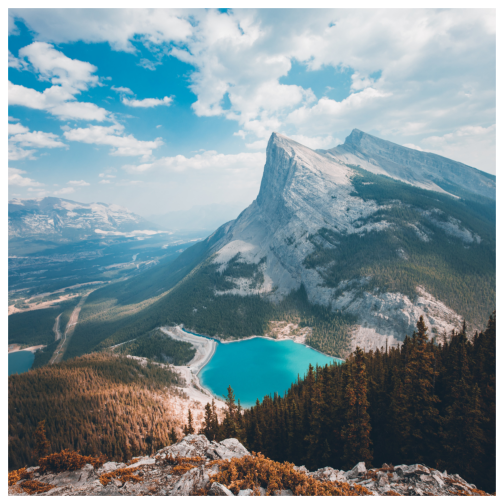

In [29]:
image = cv2.imread('mountain.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9, 9))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [30]:
vectorized = np.float32(image.reshape((-1, 3)))
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

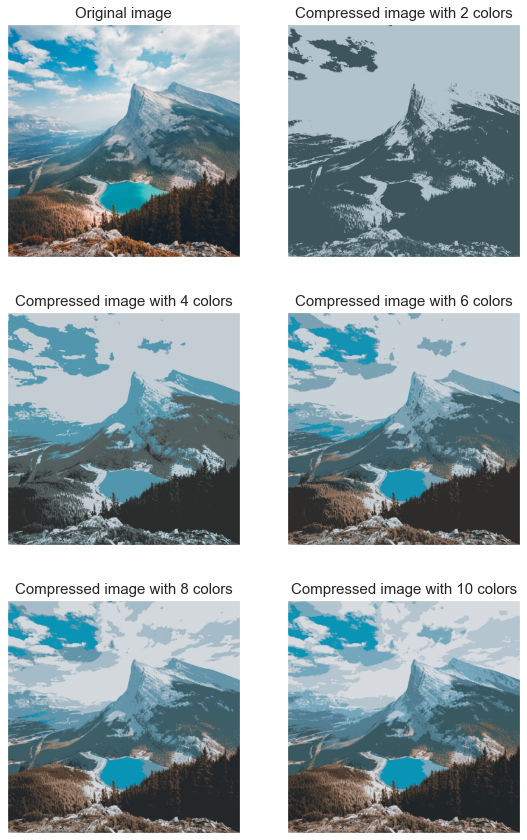

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(right=0.6)
axes=np.ravel(axes)
axes[0].imshow(image)
axes[0].set_title('Original image', fontsize=15)
axes[0].set_xticks([])
axes[0].set_yticks([])
for K, ax in zip(range(2, 11, 2), axes[1:]):
    ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

    center = np.uint8(center)

    res = center[label.flatten()]
    result_image = res.reshape((image.shape))

    
    ax.imshow(result_image)
    ax.set_title('Compressed image with %i colors' % K, fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig(GRAPHS_FOLDER.format('Task 3/Compressed images'), bbox_inches='tight')
plt.show()

## Пункт 4

Постройте дендрограмму для набора данных votes.csv (число голосов, поданных за республиканцев на выборах с 1856 по 1976 год). Строки представляют 50 штатов, а столбцы -  годы выборов (31). Проинтерпретируйте полученный результат.

In [32]:
data = pd.read_csv('votes.csv')
data.head()

,X1856,X1860,X1864,X1868,X1872,X1876,X1880,X1884,X1888,X1892,...,X1940,X1944,X1948,X1952,X1956,X1960,X1964,X1968,X1972,X1976
0,NaN,NaN,NaN,51.44,53.19,40.02,36.98,38.44,32.28,3.95,...,14.34,18.20,19.04,35.02,39.39,41.75,69.5,14.0,72.4,43.48
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.94,34.1,45.3,58.1,62.91
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.01,40.90,43.82,58.35,60.99,55.52,50.4,54.8,64.7,58.62
3,NaN,NaN,NaN,53.73,52.17,39.88,39.55,40.50,38.07,32.01,...,20.87,29.84,21.02,43.76,45.82,43.06,43.9,30.8,68.9,34.97
4,18.77,32.96,58.63,50.24,56.38,50.88,48.92,52.08,49.95,43.76,...,41.35,42.99,47.14,56.39,55.40,50.10,40.9,47.8,55.0,50.89


In [33]:
data[data.isna().any(axis=1)].isna().sum(axis=1)

0      3
1     26
2     14
3      3
5      6
8      5
9      3
10    26
11     9
15     2
17     3
22     1
23     4
24     1
25     9
26     3
27     2
30    14
32     3
33     9
35    13
36     1
39     3
40    10
41     3
42     4
43    10
45     2
46     9
47     2
49    14
dtype: int64

In [34]:
data['total_nans'] = data.isna().sum(axis=1)
objects_with_nan = data.index[data['total_nans'].between(0, 4, inclusive=False)]
for index in objects_with_nan:
    med = data.iloc[index].median()
    data.iloc[index] = data.iloc[index].fillna(value=med)

In [35]:
data = data.dropna()
data = data.drop('total_nans', axis=1)
data.head()

,X1856,X1860,X1864,X1868,X1872,X1876,X1880,X1884,X1888,X1892,...,X1940,X1944,X1948,X1952,X1956,X1960,X1964,X1968,X1972,X1976
0,30.98,30.98,30.98,51.44,53.19,40.02,36.98,38.44,32.28,3.95,...,14.34,18.20,19.04,35.02,39.39,41.75,69.5,14.0,72.4,43.48
3,37.31,37.31,37.31,53.73,52.17,39.88,39.55,40.50,38.07,32.01,...,20.87,29.84,21.02,43.76,45.82,43.06,43.9,30.8,68.9,34.97
4,18.77,32.96,58.63,50.24,56.38,50.88,48.92,52.08,49.95,43.76,...,41.35,42.99,47.14,56.39,55.40,50.10,40.9,47.8,55.0,50.89
6,53.18,53.86,51.38,51.54,52.25,48.34,50.52,48.01,48.44,46.80,...,46.30,46.94,49.55,55.70,63.73,46.27,32.2,44.3,58.6,52.64
7,2.11,23.71,48.20,40.98,50.99,44.55,47.86,42.75,43.55,48.55,...,45.05,45.27,50.04,51.75,55.09,49.00,39.1,45.1,59.6,47.27


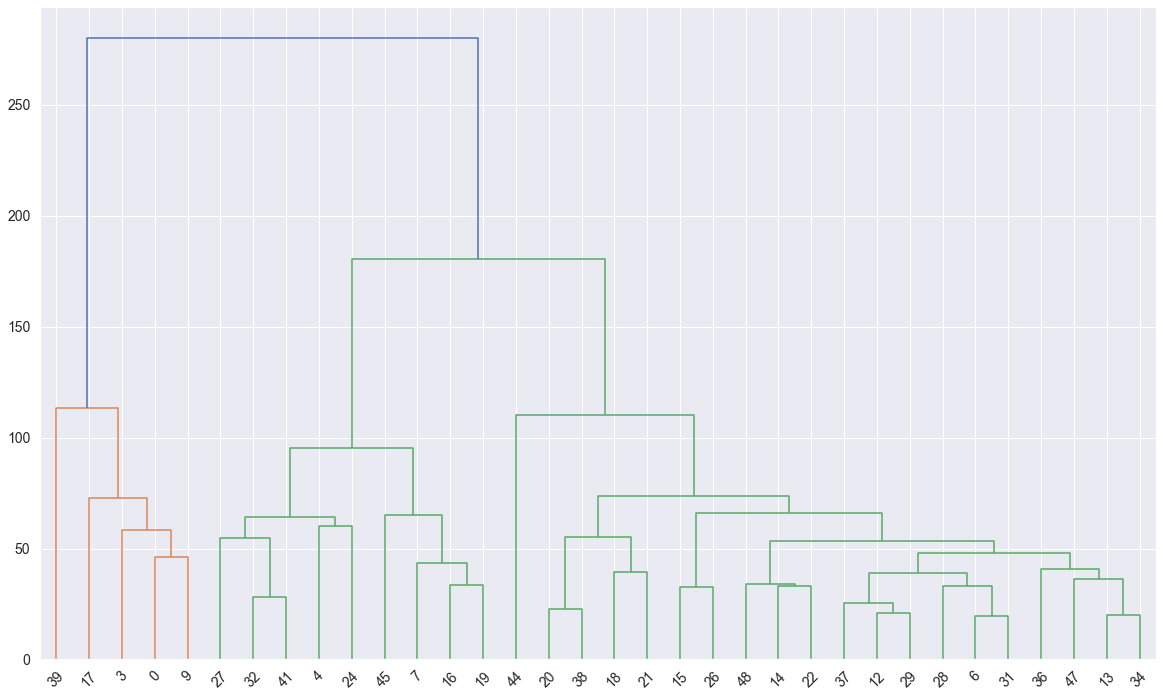

In [36]:
Z = linkage(data.values, method='complete')
plt.figure(figsize=(20, 12))
dendrogram(Z, labels=data.index)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig(GRAPHS_FOLDER.format('Task 4/Dendrogram'), bbox_inches='tight')
plt.show()